## Data processing

In [ ]:
# load data
from __future__ import print_function

import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np
import itertools
import timeit

plt.style.use('fivethirtyeight')
%matplotlib inline

cancer=pd.read_csv('breast-cancer-w-diag.csv', header=0)
cancer.isnull().sum()

In [ ]:
sns.countplot(x='diagnosis',data=cancer)
plt.show()

In [3]:
cancer.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [4]:
cancer.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

      ...       texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0     ...               17.33           184.60      2019.0            0.1622   
1     ...               23.41           158.80      1956.0            0.1238   
2     ...               25.53           152.50      1709.0            0.1444   
3     ...               26.50            98.87       567.7            0.2098   
4     ...               16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [5]:
cancer.drop('id',axis=1,inplace=True)
cancer.drop('Unnamed: 32',axis=1,inplace=True)
# size of the dataframe
len(cancer)

569

In [6]:
cancer.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [7]:
cancer['diagnosis'] = cancer['diagnosis'].map({'M':1,'B':0})
cancer.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean           ...             radius_worst  texture_worst  \
0         0.2419           ...                    25.38          17.33   
1         0.1812           ...                    24.99          23.41   
2         0.2069           ...                    23.57          25.53   
3         0.2597           ...                    14.91          26.50   
4         0.1809           ...                    22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678  

[5 rows x 31 columns]

In [8]:
cancer.head(2)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38           122.8     1001.0   
1          1        20.57         17.77           132.9     1326.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   

   symmetry_mean           ...             radius_worst  texture_worst  \
0         0.2419           ...                    25.38          17.33   
1         0.1812           ...                    24.99          23.41   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0            184.6      2019.0            0.1622             0.6656   
1            158.8      1956.0            0.1238             0.1866   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  

[2 rows x 31 columns]

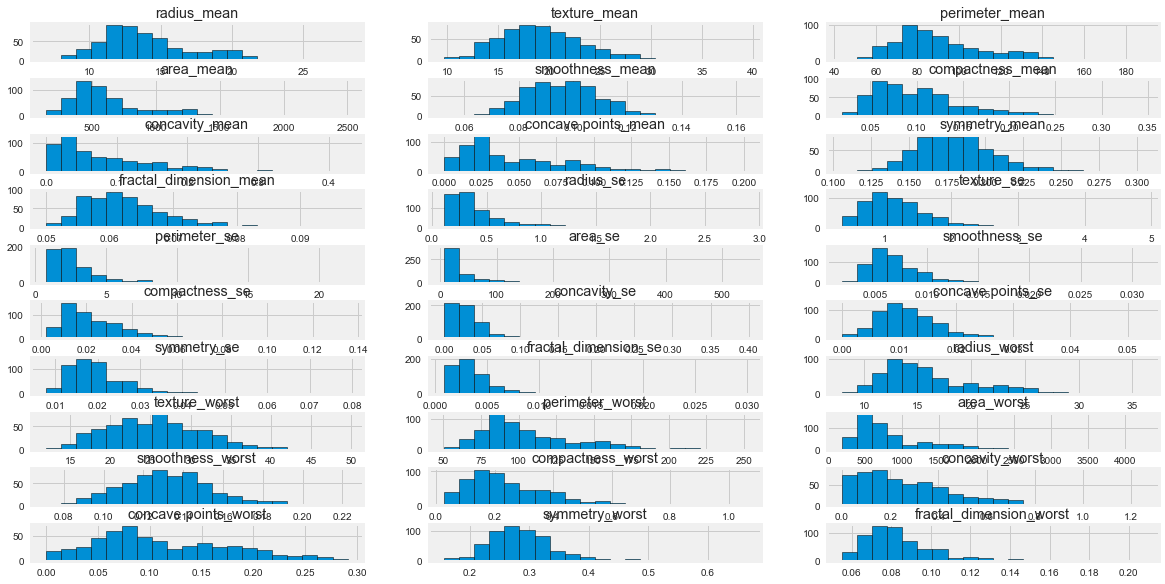

In [9]:
columns=cancer.columns[1:31]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    cancer[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

### nucleus features vs diagnosis

In [10]:
features_mean=list(cancer.columns[1:11])
# split dataframe into two based on diagnosis
dfM=cancer[cancer['diagnosis'] ==1]
dfB=cancer[cancer['diagnosis'] ==0]

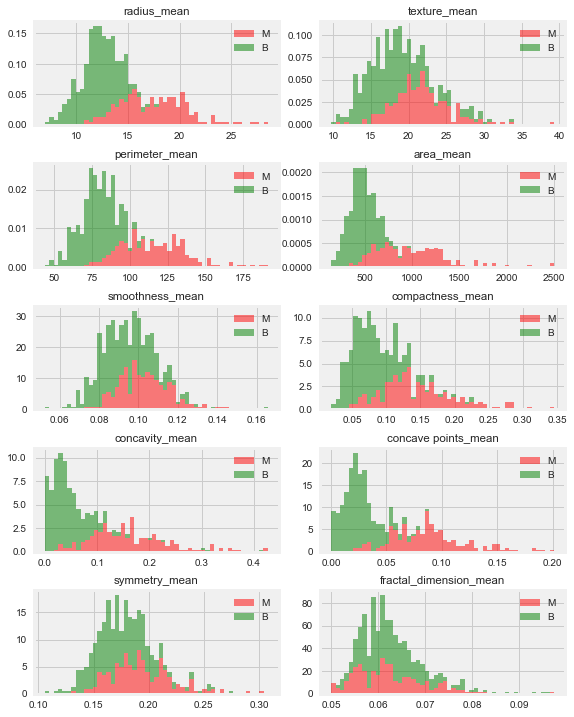

In [11]:
#Stack the data
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(cancer[features_mean[idx]]) - min(cancer[features_mean[idx]]))/50
    ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], bins=np.arange(min(cancer[features_mean[idx]]), max(cancer[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, normed = True, label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

### Import libraries

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.learning_curve import validation_curve
from sklearn.learning_curve import learning_curve
from time import time
import warnings
warnings.filterwarnings('ignore')

# set the following figure sizes
plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'figure.figsize': (4,3)})

/Users/qizhang/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/qizhang/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


### Stratification
When we split the dataset into train and test datasets, the split is completely random. Thus the instances of each class label or outcome in the train or test datasets is random. Thus we may have many instances of class 1 in training data and less instances of class 2 in the training data. So during classification, we may have accurate predictions for class1 but not for class2. Thus we stratify the data, so that we have proportionate data for all the classes in both the training and testing data.

In [13]:
cancer.shape

(569, 31)

In [14]:
#outcome=cancer['LeagueIndex']
#data=cancer[cancer.columns[:18]]
train,test=train_test_split(cancer,test_size=0.2,random_state=0,stratify=cancer['diagnosis'])# stratify the outcome
train_X=train[train.columns[1:31]]
test_X=test[test.columns[1:31]]
train_Y=train['diagnosis']
test_Y=test['diagnosis']

In [15]:
train_X.head(5)

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
381        11.04         14.93           70.67      372.7          0.07987   
144        10.75         14.97           68.26      355.3          0.07793   
136        11.71         16.67           74.72      423.6          0.10510   
116         8.95         15.76           58.74      245.2          0.09462   
567        20.60         29.33          140.10     1265.0          0.11780   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
381           0.07079         0.03546             0.020740         0.2003   
144           0.05139         0.02251             0.007875         0.1399   
136           0.06095         0.03592             0.026000         0.1339   
116           0.12430         0.09263             0.023080         0.1305   
567           0.27700         0.35140             0.152000         0.2397   

     fractal_dimension_mean           ...             radius_worst  \
381                 0.06246           ...                   12.090   
144                 0.05688           ...                   11.950   
136                 0.05945           ...                   13.330   
116                 0.07163           ...                    9.414   
567                 0.07016           ...                   25.740   

     texture_worst  perimeter_worst  area_worst  smoothness_worst  \
381          20.83            79.73       447.1            0.1095   
144          20.72            77.79       441.2            0.1076   
136          25.48            86.16       546.7            0.1271   
116          17.07            63.34       270.0            0.1179   
567          39.42           184.60      1821.0            0.1650   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
381             0.1982          0.15530               0.06754          0.3202   
144             0.1223          0.09755               0.03413          0.2300   
136             0.1028          0.10460               0.06968          0.1712   
116             0.1879          0.15440               0.03846          0.1652   
567             0.8681          0.93870               0.26500          0.4087   

     fractal_dimension_worst  
381                  0.07287  
144                  0.06769  
136                  0.07343  
116                  0.07722  
567                  0.12400  

[5 rows x 30 columns]

In [16]:
train_Y.head(2)

381    0
144    0
Name: diagnosis, dtype: int64

In [17]:
train_X.shape

(455, 30)

In [18]:
test_X.shape

(114, 30)

In [19]:
train_X.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### Scale Data

In [20]:
from sklearn.preprocessing import StandardScaler

# fit a standardScaler to normalize all input to zero mean and unit variance
scaler = StandardScaler().fit(train_X)
train_X = pd.DataFrame(scaler.transform(train_X), columns = train_X.columns)
test_X = pd.DataFrame(scaler.transform(test_X), columns = test_X.columns)

In [21]:
type(train_X)

pandas.core.frame.DataFrame

In [22]:
train_X.head(2)

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0    -0.862083     -1.009094       -0.861347  -0.786765        -1.158494   
1    -0.944093     -0.999941       -0.959931  -0.835771        -1.296173   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0         -0.615198       -0.654171            -0.707010       0.692286   
1         -0.978211       -0.811038            -1.031182      -1.503224   

   fractal_dimension_mean           ...             radius_worst  \
0               -0.047962           ...                -0.857701   
1               -0.836375           ...                -0.886863   

   texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0      -0.802311        -0.809130   -0.753108         -0.996486   
1      -0.820201        -0.866969   -0.763508         -1.079789   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0          -0.346704        -0.553743             -0.697964        0.481210   
1          -0.830368        -0.824462             -1.197365       -0.972434   

   fractal_dimension_worst  
0                -0.604967  
1                -0.886765  

[2 rows x 30 columns]

In [23]:
test_X.head(5)

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0    -0.053297     -0.622377       -0.112757  -0.148275        -1.981021   
1     0.141829      0.764310        0.190769   0.014234        -0.813586   
2    -0.678268      1.167045       -0.628180  -0.691851         1.944969   
3    -0.347401     -1.377504       -0.364332  -0.414712         1.221088   
4    -0.907330     -0.851204       -0.871982  -0.825632         0.319785   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0         -0.944529       -0.814308            -0.892215       0.001646   
1          0.548877        0.162748            -0.288219      -1.303302   
2          0.964284       -0.536793            -0.087895       1.157560   
3         -0.286802       -0.623403            -0.372884      -0.979791   
4          0.060493       -0.464114            -0.833755       0.176123   

   fractal_dimension_mean           ...             radius_worst  \
0               -1.051140           ...                -0.222375   
1               -0.187842           ...                -0.151552   
2                1.589620           ...                -0.672311   
3                0.277011           ...                -0.451509   
4                0.787078           ...                -0.888946   

   texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0      -0.644550        -0.169032   -0.273983         -1.683079   
1       0.245089        -0.028908   -0.248246         -1.299008   
2       1.045277        -0.618621   -0.681539          1.954199   
3      -0.761651        -0.419466   -0.484460          0.985252   
4      -1.043018        -0.777826   -0.777787          0.042611   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0          -0.331410        -0.632967             -0.777486       -0.361645   
1           0.410973         0.434908             -0.055814       -1.040120   
2           0.461952        -0.627810              0.247623       -0.161810   
3          -0.188031        -0.442174              0.018924       -0.840285   
4           0.874246         0.295681             -0.516799       -0.519580   

   fractal_dimension_worst  
0                -0.381378  
1                -0.214911  
2                 0.854616  
3                 0.083751  
4                 1.306145  

[5 rows x 30 columns]

## Decision Tree

### A simple run

In [24]:
from sklearn.tree import DecisionTreeClassifier
#clf = DecisionTreeClassifier()
clf = DecisionTreeClassifier(max_depth=10, min_samples_split=2, max_leaf_nodes=15, criterion='entropy', min_samples_leaf=1)
clf.fit(train_X, train_Y)
train_acc = clf.score(train_X, train_Y)
test_acc = clf.score(test_X, test_Y)
#print "Train acc:", train_acc
#print "Test acc:", test_acc

### pruning by max depth, validation curve

In [25]:
degree = range(1,31)
train_scores, val_scores = validation_curve(DecisionTreeClassifier(criterion='gini',random_state=42), train_X, train_Y,
                                          'max_depth', degree, cv=10)

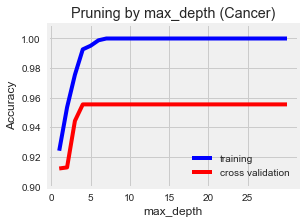

In [26]:
f = plt.figure()
plt.plot(degree, np.median(train_scores, 1),color='blue', label='training')
plt.plot(degree, np.median(val_scores, 1), color='red', label='cross validation')
#plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
#plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc='lower right')
plt.ylim(0.9, 1.01)
plt.title("Pruning by max_depth (Cancer)")
plt.xlabel('max_depth')
plt.ylabel('Accuracy');
plt.xticks(np.arange(0,30,5))
plt.show()
f.savefig("/Users/qizhang/Gatech/CS7641/A1/figures/c01.pdf", bbox_inches='tight')



### change min split
The minimum number of samples required to split an internal node

In [27]:
degree = range(2,100)
train_scores, val_scores = validation_curve(DecisionTreeClassifier(max_depth=5,random_state=42), train_X, train_Y,
                                          'min_samples_split', degree, cv=10)

In [28]:
f = plt.figure()

plt.plot(degree, np.mean(train_scores, 1), color='blue', label='training score')
plt.plot(degree, np.mean(val_scores, 1), color='red', label='validation score')
plt.legend(loc='lower right')
plt.ylim(0.85, 1.01)
plt.title("Pruning by min_samples_split (Cancer)")
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy');
plt.show()
f.savefig("/Users/qizhang/Gatech/CS7641/A1/figures/c02.pdf", bbox_inches='tight')



### Grid search to find best parameter

In [ ]:
# determine optimal pruning for the decision trees using cross-validation grid-search

# set of parameters to test
param_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2,3,4, 5,6, 10, 20],
              "max_depth": [2, 3,4,5,6,7, 10, 15, 20],
              }

tree_gs = GridSearchCV(DecisionTreeClassifier(random_state=42),
                       param_grid=param_grid, cv=3)

tree_gs.fit(train_X, train_Y)

In [ ]:
tree_gs.best_params_

### statistics for best parameter

In [ ]:
tree_final_model = tree_gs.best_estimator_
start = timeit.default_timer()
clf = tree_final_model.fit(train_X, train_Y)
stop = timeit.default_timer()
train_time = stop - start
treeObj = clf.tree_

# train
train_Y_predict = clf.predict(train_X)
train_acc = accuracy_score(train_Y, train_Y_predict)

# test
start = timeit.default_timer()
test_Y_predict = clf.predict(test_X)
stop = timeit.default_timer()
test_time = stop - start
test_acc = accuracy_score(test_Y, test_Y_predict)

# print result
#print 'tree size: ', treeObj.node_count
#print 'train acc: ', train_acc
#print 'test acc: ', test_acc
#print 'train time: ', train_time
#print 'test time: ', test_time

### statistics for default parameter (no pruning)

In [ ]:
clf = DecisionTreeClassifier()
start = timeit.default_timer()
clf = clf.fit(train_X, train_Y)
stop = timeit.default_timer()
train_time = stop - start
treeObj = clf.tree_

# train
train_Y_predict = clf.predict(train_X)
train_acc = accuracy_score(train_Y, train_Y_predict)

# test
start = timeit.default_timer()
test_Y_predict = clf.predict(test_X)
stop = timeit.default_timer()
test_time = stop - start
test_acc = accuracy_score(test_Y, test_Y_predict)

# print result
#print 'tree size: ', treeObj.node_count
#print 'train acc: ', train_acc
#print 'test acc: ', test_acc
#print 'train time: ', train_time
#print 'test time: ', test_time

### learning curve on best parameter

In [ ]:
training_size, train_lc, val_lc = learning_curve(tree_final_model,
                                         train_X, train_Y, cv=10,
                                         #train_sizes=np.arange(1, 409), n_jobs=1)
                                         train_sizes=np.linspace(0.001, 1, 50), n_jobs=1)

In [ ]:
f = plt.figure()

plt.plot(training_size, np.mean(train_lc, 1), color='blue', label='training')
plt.plot(training_size, np.mean(val_lc, 1), color='red', label='cross validation')
plt.hlines(np.mean([train_lc[-1], val_lc[-1]]), training_size[0], training_size[-1],
                 color='gray', linestyle='dashed')

plt.legend(loc='lower right')
plt.ylim(0.6, 1.05)
plt.xlim(training_size[0], training_size[-1])
plt.title("DT Learning curve (Cancer)")
plt.xlabel('training size')
plt.ylabel('Accuracy');
plt.show()
f.savefig("/Users/qizhang/Gatech/CS7641/A1/figures/c03.pdf", bbox_inches='tight')


### learning curve on a unprune tree

In [ ]:
training_size, train_lc, val_lc = learning_curve(DecisionTreeClassifier(),
                                         train_X, train_Y, cv=10,
                                         train_sizes=np.linspace(0.001, 1, 50), n_jobs=1)

In [ ]:
f = plt.figure()
plt.plot(training_size, np.mean(train_lc, 1), color='blue', label='training')
plt.plot(training_size, np.mean(val_lc, 1), color='red', label='cross validation')
plt.hlines(np.mean([train_lc[-1], val_lc[-1]]), training_size[0], training_size[-1],
                 color='gray', linestyle='dashed')

plt.legend(loc='lower right')
plt.ylim(0.5, 1.05)
plt.xlim(training_size[0], training_size[-1])
plt.title("DT Learning curve (Cancer)")
plt.xlabel('training size')
plt.ylabel('Accuracy');
plt.show()
f.savefig("/Users/qizhang/Gatech/CS7641/A1/figures/c04.pdf", bbox_inches='tight')



## Boosting
hyperparameters:

1) n_estimators

2) learning_rate

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

### boosting - varying tree size and iteration

In [ ]:
# don't change!!!

#degree = range(1,51,5)
degree = [1,2,5,10,20,50,100,200]
train_scoresb1, val_scoresb1 = validation_curve(AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=2)), train_X, train_Y,
                                          'n_estimators', degree, cv=10)
train_scoresb2, val_scoresb2 = validation_curve(AdaBoostClassifier(DecisionTreeClassifier(max_depth=5,min_samples_split=2)), train_X, train_Y,
                                          'n_estimators', degree, cv=10)
train_scoresb3, val_scoresb3 = validation_curve(AdaBoostClassifier(DecisionTreeClassifier(max_depth=10,min_samples_split=2)), train_X, train_Y,
                                          'n_estimators', degree, cv=10)
train_scoresb4, val_scoresb4 = validation_curve(AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=2)), train_X, train_Y,
                                          'n_estimators', degree, cv=10)


In [ ]:
f = plt.figure()
plt.plot(degree, np.mean(val_scoresb1, 1), color='green', label='max_depth=2')
plt.plot(degree, np.mean(val_scoresb2, 1), color='blue', label='max_depth=5')
#plt.plot(degree, np.mean(val_scoresb3, 1), color='purple', label='max_depth=10')
plt.plot(degree, np.mean(val_scoresb4, 1), color='red', label='unpruned')

plt.legend(loc='upper right')
plt.ylim(0.9, 1.05)
plt.title("Boosting: varying tree size (Cancer)")
plt.xlabel('# of iterations')
plt.ylabel('Cross-Validation Accuracy');
plt.show()
f.savefig("/Users/qizhang/Gatech/CS7641/A1/figures/c05.pdf", bbox_inches='tight')



### boosting - vary learning rate

In [ ]:
degree = np.arange(0.1,3,0.2)
train_scores, val_scores = validation_curve(AdaBoostClassifier(DecisionTreeClassifier(max_depth=4, min_samples_split=2)), train_X, train_Y,
                                          'learning_rate', degree, cv=10)

In [ ]:
f = plt.figure()
plt.plot(degree, np.mean(train_scores, 1), color='blue', label='training')
plt.plot(degree, np.mean(val_scores, 1), color='red', label='cross validation')

plt.legend(loc='lower right')
plt.ylim(0.7, 1.02)
plt.title("Boosting: varying learning rate \n on pruned tree (Cancer)")
plt.xlabel('learning rate')
plt.ylabel('Accuracy');
#plt.xticks(np.arange(0,2.1,0.5))
plt.show()
f.savefig("/Users/qizhang/Gatech/CS7641/A1/figures/c06.pdf", bbox_inches='tight')



### grid search

In [ ]:
param_grid = {"n_estimators": [1,5,10,15,30,40,50],
              "learning_rate": [.1, .5, 1.,1.2,1.5]
              }

tree_boost_gs = GridSearchCV(AdaBoostClassifier(tree_final_model),
                       param_grid=param_grid, cv=10)

tree_boost_gs.fit(train_X, train_Y)

In [ ]:
tree_boost_gs.best_params_

In [ ]:
boost_final_model = tree_boost_gs.best_estimator_
clf = boost_final_model.fit(train_X, train_Y)

# train
train_Y_predict = clf.predict(train_X)
train_acc = accuracy_score(train_Y, train_Y_predict)

# test
test_Y_predict = clf.predict(test_X)
test_acc = accuracy_score(test_Y, test_Y_predict)

# print result
print('train acc: ', train_acc)
print('test acc: ', test_acc)

### boosting, best model result

In [ ]:
boost_temp_model = AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy',max_depth=4, min_samples_split=2),
                                     n_estimators=50, learning_rate=1.2)
clf = boost_temp_model.fit(train_X, train_Y)

start = timeit.default_timer()
clf = clf.fit(train_X, train_Y)
stop = timeit.default_timer()
train_time = stop - start

# train
train_Y_predict = clf.predict(train_X)
train_acc = accuracy_score(train_Y, train_Y_predict)

# test
start = timeit.default_timer()
test_Y_predict = clf.predict(test_X)
stop = timeit.default_timer()
test_time = stop - start
test_acc = accuracy_score(test_Y, test_Y_predict)

# print result
#print 'train acc: ', train_acc
#print 'test acc: ', test_acc
#print 'train time: ', train_time
#print 'test time: ', test_time

### boosting time vs iterations

In [ ]:
time=[]
iteration=[]
for i in range(1,200,5):
    start = timeit.default_timer()
    clf = AdaBoostClassifier(tree_final_model, n_estimators=i)
    clf = clf.fit(train_X, train_Y)
    stop = timeit.default_timer()
    time.append(stop - start)
    iteration.append(i)

In [ ]:
f = plt.figure()
plt.plot(iteration, time)
plt.legend(loc='lower right')
#plt.ylim(0.7, 1.02)
plt.title("Boosting: training time vs iterations \n(Cancer)")
plt.xlabel('# of iterations')
plt.ylabel('Training Time (s)');
#plt.xticks(np.arange(0,2.1,0.5))
plt.show()
f.savefig("/Users/qizhang/Gatech/CS7641/A1/figures/c07.pdf", bbox_inches='tight')



## knn

hyperparameters:

k

weight/unweight

### A simple run

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform', p=1)
clf.fit(train_X, train_Y)
train_acc = clf.score(train_X, train_Y)
test_acc = clf.score(test_X, test_Y)
#print "Train acc:", train_acc
#print "Test acc:", test_acc

### knn - change k unweighted

In [ ]:
degree = range(1,51)
train_scores, val_scores = validation_curve(KNeighborsClassifier(), train_X, train_Y,
                                          'n_neighbors', degree, cv=10)

In [ ]:
f = plt.figure()
plt.plot(degree, np.mean(train_scores, 1), color='blue', label='training')
plt.plot(degree, np.mean(val_scores, 1), color='red', label='cross validation')
plt.legend(loc='lower right')
plt.ylim(0.92, 1.01)
plt.title("KNN: unweighted (Cancer)")
plt.xlabel('k (n_neighbors)')
plt.ylabel('Accuracy');
plt.show()
f.savefig("/Users/qizhang/Gatech/CS7641/A1/figures/c08.pdf", bbox_inches='tight')



### knn - change k weighted by distance

In [ ]:
degree = range(1,51)
train_scores_w, val_scores_w = validation_curve(KNeighborsClassifier(weights = 'distance'), train_X, train_Y,
                                          'n_neighbors', degree, cv=10)

In [ ]:
f = plt.figure()
plt.plot(degree, np.mean(train_scores_w, 1), color='blue', label='training')
plt.plot(degree, np.mean(val_scores_w, 1), color='red', label='cross validation')
plt.legend(loc='lower right')
plt.ylim(0.92, 1.01)
plt.title("KNN: weighted (Cancer)")
plt.xlabel('k (n_neighbors)')
plt.ylabel('Accuracy');
plt.show()
f.savefig("/Users/qizhang/Gatech/CS7641/A1/figures/c09.pdf", bbox_inches='tight')



### knn - unweighted vs weighted

In [ ]:
f = plt.figure()
plt.plot(degree, np.mean(train_scores, 1), color='yellow', label='training')
plt.plot(degree, np.mean(val_scores, 1), color='green', label='cross validation')
plt.plot(degree, np.mean(train_scores_w, 1), color='blue', label='w training')
plt.plot(degree, np.mean(val_scores_w, 1), color='red', label='w cross validation')
plt.legend(loc='lower right')
plt.ylim(0.92, 1.01)
plt.title("KNN: weighted vs unweighted (Cancer)")
plt.xlabel('k (n_neighbors)')
plt.ylabel('Accuracy');
plt.show()
f.savefig("/Users/qizhang/Gatech/CS7641/A1/figures/c10.pdf", bbox_inches='tight')



### knn grid search

In [ ]:
param_grid = {"n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,25,30,40,45,50],
              "p": [1, 2],
              "weights": ['uniform', 'distance']
              }

knn_gs = GridSearchCV(KNeighborsClassifier(),
                       param_grid=param_grid, cv=10)

knn_gs.fit(train_X, train_Y)

In [ ]:
knn_gs.best_estimator_

In [ ]:
knn_final_model = knn_gs.best_estimator_
test_Y_predict = knn_final_model.fit(train_X, train_Y).predict(test_X)
accuracy_score(test_Y, test_Y_predict)

In [ ]:
knn_weighted_model = KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')
test_Y_predict = knn_final_model.fit(train_X, train_Y).predict(test_X)
accuracy_score(test_Y, test_Y_predict)

### knn: result for best model

In [ ]:
knn_temp_model = KNeighborsClassifier(n_neighbors=3, p=1, weights='uniform')
clf = knn_temp_model.fit(train_X, train_Y)

start = timeit.default_timer()
clf = clf.fit(train_X, train_Y)
stop = timeit.default_timer()
train_time = stop - start

# train
train_Y_predict = clf.predict(train_X)
train_acc = accuracy_score(train_Y, train_Y_predict)

# test
start = timeit.default_timer()
test_Y_predict = clf.predict(test_X)
stop = timeit.default_timer()
test_time = stop - start
test_acc = accuracy_score(test_Y, test_Y_predict)

# print result
#print 'train acc: ', train_acc
#print 'test acc: ', test_acc
#print 'train time: ', train_time
#print 'test time: ', test_time

### knn - learning curve on best model

In [ ]:
training_size, train_lc, val_lc = learning_curve(knn_final_model,
                                         train_X, train_Y, cv=10,
                                         train_sizes=np.arange(10,409,5), n_jobs=5)

In [ ]:
f = plt.figure()
plt.plot(training_size, np.mean(train_lc, 1), color='blue', label='training score')
plt.plot(training_size, np.mean(val_lc, 1), color='red', label='validation score')
plt.hlines(np.mean([train_lc[-1], val_lc[-1]]), training_size[0], training_size[-1],
                 color='gray', linestyle='dashed')

plt.legend(loc='lower right')
plt.ylim(0.75, 1.05)
plt.xlim(training_size[0], training_size[-1])
plt.title("KNN: Learning curve (Cancer)")
plt.xlabel('training size')
plt.ylabel('Accuracy');
plt.show()
f.savefig("/Users/qizhang/Gatech/CS7641/A1/figures/c11.pdf", bbox_inches='tight')



### knn: time vs iterations

In [ ]:
train_time=[]
test_time=[]
iteration=[]
for i in range(1,51):
    start = timeit.default_timer()
    clf = KNeighborsClassifier(n_neighbors=i, weights='distance')
    clf = clf.fit(train_X, train_Y)
    stop = timeit.default_timer()
    train_time.append(stop - start)
    start = timeit.default_timer()
    test_Y_predict = clf.predict(test_X)
    stop = timeit.default_timer()
    test_time.append(stop - start)
    iteration.append(i)

In [ ]:
f = plt.figure()
plt.plot(iteration, train_time, color='blue', label='training time')
plt.plot(iteration, test_time, color='red', label='testing time')
plt.legend(loc='upper left')
#plt.ylim(0.7, 1.02)
plt.title("KNN: training time vs testing time \n weighted (Cancer)")
plt.xlabel('k (n_neighbors)')
plt.ylabel('Time (s)');
#plt.xticks(np.arange(0,2.1,0.5))
plt.show()
f.savefig("/Users/qizhang/Gatech/CS7641/A1/figures/c12.pdf", bbox_inches='tight')



## svm

hyperparameters:

Linear Kernel: No parameters

Polynomial: degree (and C)

RBF: gamma and C

### a simple run

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(train_X, train_Y)
train_acc = clf.score(train_X, train_Y)
test_acc = clf.score(test_X, test_Y)
#print "Train acc:", train_acc
#print "Test acc:", test_acc

In [ ]:
clf = svm.SVC(kernel='rbf')
clf.fit(train_X, train_Y)
train_acc = clf.score(train_X, train_Y)
test_acc = clf.score(test_X, test_Y)
#print "Train acc:", train_acc
#print "Test acc:", test_acc

In [ ]:
clf = svm.SVC(kernel='poly')
clf.fit(train_X, train_Y)
train_acc = clf.score(train_X, train_Y)
test_acc = clf.score(test_X, test_Y)
#print "Train acc:", train_acc
#print "Test acc:", test_acc

### svm - poly kernel, degree vs C

In [ ]:
degree = range(1,11)
#degree = [1,2,3,4,5,7,10]
train_scores_svm1, val_scores_svm1 = validation_curve(svm.SVC(kernel='poly', C=0.01), train_X, train_Y,
                                          'degree', degree, cv=10)
train_scores_svm2, val_scores_svm2 = validation_curve(svm.SVC(kernel='poly', C=0.1), train_X, train_Y,
                                          'degree', degree, cv=10)
train_scores_svm3, val_scores_svm3 = validation_curve(svm.SVC(kernel='poly', C=1), train_X, train_Y,
                                          'degree', degree, cv=10)
train_scores_svm4, val_scores_svm4 = validation_curve(svm.SVC(kernel='poly', C=10), train_X, train_Y,
                                          'degree', degree, cv=10)

In [ ]:
f = plt.figure()
plt.plot(degree, np.mean(val_scores_svm4, 1), color='red', label='C=10')
plt.plot(degree, np.mean(val_scores_svm3, 1), color='purple', label='C=1.0')
plt.plot(degree, np.mean(val_scores_svm2, 1), color='green', label='C=0.1')
plt.plot(degree, np.mean(val_scores_svm1, 1), color='blue', label='C=0.01')

plt.legend(loc='upper right')
plt.ylim(0.6, 1.1)
plt.title("SVM: polynomial kernel (Cancer) \n varying poly degree and C")
plt.xlabel('polynomial degree')
plt.ylabel('Cross-Validation Accuracy');
plt.show()
f.savefig("/Users/qizhang/Gatech/CS7641/A1/figures/c13.pdf", bbox_inches='tight')



### svm - rbf, change C

In [ ]:
#degree = [0.03,0.1,0.3,1.0,3.0,10.0,30.0,100.0,300]
degree = np.logspace(-1.5, 3, 10)
train_scores, val_scores = validation_curve(svm.SVC(kernel='rbf'), train_X, train_Y,
                                          'C', degree, cv=10)

In [ ]:
f = plt.figure()
plt.plot(degree, np.median(train_scores, 1), 'o-',color='blue', label='training')
plt.plot(degree, np.median(val_scores, 1), 'o-', color='red', label='cross validation')

plt.legend(loc='upper right')
plt.ylim(0.9, 1.1)
plt.title("SVM: RBF kernel (Cancer)\n gamma=1/30, varying C")
plt.xlabel('C')
plt.ylabel('Accuracy');
plt.xscale('log')
plt.show()
f.savefig("/Users/qizhang/Gatech/CS7641/A1/figures/c14.pdf", bbox_inches='tight')



### svm - rbf change gamma

In [ ]:
#degree = [0.0001,0.0003,0.001,0.003,0.01,0.03,0.1,0.3]
degree = np.logspace(-4, 1, 11)

train_scores, val_scores = validation_curve(svm.SVC(kernel='rbf'), train_X, train_Y,
                                          'gamma', degree, cv=10)

In [ ]:
f = plt.figure()


plt.plot(degree, np.median(train_scores, 1), 'o-',color='blue', label='training')
plt.plot(degree, np.median(val_scores, 1), 'o-', color='red', label='cross validation')

plt.legend(loc='upper right')
plt.ylim(0.6, 1.2)
plt.title("SVM: RBF kernel (Cancer)\n C=1.0, varying gamma")
plt.xlabel('gamma')
plt.ylabel('Accuracy');
plt.xscale('log')
plt.show()
f.savefig("/Users/qizhang/Gatech/CS7641/A1/figures/c15.pdf", bbox_inches='tight')



### SVM: result for best parameters

In [ ]:
clf = svm.SVC(kernel='rbf', C=10, gamma=0.01)
#clf = grid.best_estimator_
start = timeit.default_timer()
clf = clf.fit(train_X, train_Y)
stop = timeit.default_timer()
train_time = stop - start

# train
train_Y_predict = clf.predict(train_X)
train_acc = accuracy_score(train_Y, train_Y_predict)

# test
start = timeit.default_timer()
test_Y_predict = clf.predict(test_X)
stop = timeit.default_timer()
test_time = stop - start
test_acc = accuracy_score(test_Y, test_Y_predict)

# print result
#print 'train acc: ', train_acc
#print 'test acc: ', test_acc
#print 'train time: ', train_time
#print 'test time: ', test_time

### svm: learning curve

In [ ]:
# use best rbf kernel
training_size, train_lc, val_lc = learning_curve(svm.SVC(kernel='rbf', C=10, gamma=0.01),
                                         train_X, train_Y, cv=10,
                                         train_sizes=np.arange(10,409,10), n_jobs=1)

In [ ]:
f= plt.figure()
plt.plot(training_size, np.mean(train_lc, 1), color='blue', label='training')
plt.plot(training_size, np.mean(val_lc, 1), color='red', label='cross validation')
plt.hlines(np.mean([train_lc[-1], val_lc[-1]]), training_size[0], training_size[-1],
                 color='gray', linestyle='dashed')

plt.legend(loc='lower right')
plt.ylim(0.8, 1.01)
plt.xlim(training_size[0], training_size[-1])
plt.title("SVM: Learning curve (Cancer)")
plt.xlabel('training size')
plt.ylabel('Accuracy');
plt.show()
f.savefig("/Users/qizhang/Gatech/CS7641/A1/figures/c16.pdf", bbox_inches='tight')



## neural network

hyperparameters: the number of hidden nodes/layers, momentum and learning rates in a Neural Network are hyperparameters

### a simple mlp nn

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()
clf.fit(train_X, train_Y)
train_acc = clf.score(train_X, train_Y)
test_acc = clf.score(test_X, test_Y)
#print "Train acc:", train_acc
#print "Test acc:", test_acc

### MLP: # layers & # nodes

In [ ]:
degree = [(20,),(50,),(100,),(50,50),(50,50,50)]

mlps=[]
train_times=[]
test_times=[]
train_accs=[]
test_accs=[]

for i in range(len(degree)):
    # train
    mlp = MLPClassifier(max_iter=10000, early_stopping=True,hidden_layer_sizes=degree[i])
    start = timeit.default_timer()
    mlp.fit(train_X, train_Y)
    stop = timeit.default_timer()
    train_time = stop - start
    # train result
    train_Y_predict = clf.predict(train_X)
    train_acc = accuracy_score(train_Y, train_Y_predict)
    # test
    start = timeit.default_timer()
    test_Y_predict = clf.predict(test_X)
    stop = timeit.default_timer()
    test_time = stop - start
    test_acc = accuracy_score(test_Y, test_Y_predict)
    # save results
    mlps.append(mlp)
    train_times.append(train_time)
    test_times.append(test_time)
    train_accs.append(train_acc)
    test_accs.append(test_acc)
#    print degree[i], train_acc,test_acc,train_time,test_time

#print "degree|train acc|test acc|train time|test time"
#for i in range(len(degree)):
#    print degree[i], train_accs[i],test_accs[i],train_times[i],test_times[i]

### MLP: change L and M

In [ ]:
params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0,
           'learning_rate_init': 0.001},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'learning_rate_init': 0.001},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0.5,
           'learning_rate_init': 0.001},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0.5,
           'learning_rate_init': 0.01},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0.5,
           'learning_rate_init': 0.1},
         ]

mlps=[]

for param in params:
    mlp = MLPClassifier(hidden_layer_sizes=(22,),verbose=0, max_iter=10000, **param)
    mlp.fit(train_X, train_Y)
    mlps.append(mlp)

In [ ]:
labels = ["L=0.001, M=0", 
          "L=0.001, M=0.9", 
          "L=0.001, M=0.5", 
          "L=0.01, M=0.5", 
          "L=0.1, M=0.5", 
         ]
f = plt.figure()
plot_args = [{'c': 'red'},
             {'c': 'purple'},
             {'c': 'blue'},
             {'c': 'green'},
             {'c': 'black'}]   

for mlp, label, args in zip(mlps, labels, plot_args):
    plt.plot(mlp.loss_curve_, label=label, **args)

plt.legend(loc='upper right')
plt.ylim(-0.1, 0.9)
plt.title("MLP: varying learning_rate (L)\nand momentum (M)\n1 hidden layer, 22 nodes (Cancer)")
plt.xlabel('# of epochs')
plt.ylabel('Training Loss');
plt.show()
f.savefig("/Users/qizhang/Gatech/CS7641/A1/figures/c17.pdf", bbox_inches='tight')



### MLP: result for best parameters

In [ ]:
mlp_temp_model = MLPClassifier(hidden_layer_sizes=(22,),solver='sgd',learning_rate_init=1, 
                               momentum=0.8, max_iter=10000)
start = timeit.default_timer()
clf = clf.fit(train_X, train_Y)
stop = timeit.default_timer()
train_time = stop - start

# train
train_Y_predict = clf.predict(train_X)
train_acc = accuracy_score(train_Y, train_Y_predict)

# test
start = timeit.default_timer()
test_Y_predict = clf.predict(test_X)
stop = timeit.default_timer()
test_time = stop - start
test_acc = accuracy_score(test_Y, test_Y_predict)

# print result
#print 'train acc: ', train_acc
#print 'test acc: ', test_acc
#print 'train time: ', train_time
#print 'test time: ', test_time